<a href="https://colab.research.google.com/github/kartheikiyer/dist_py/blob/master/tests/dist_py_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.rcsetup
from tqdm import tqdm
import matplotlib

#sns.set_style('white')
sns.set(font_scale=1.8)

matplotlib.rcParams['xtick.labelsize']=18
matplotlib.rcParams['ytick.labelsize']=18
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.minor.visible'] = True

sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --index-url https://test.pypi.org/simple --no-deps dist_py
# should be dist-py-0.0.2

Looking in indexes: https://test.pypi.org/simple


In [0]:
from dist_py.dist_tests import *

In [4]:
# tests of dist_py

meanvals = np.arange(0.0,1.0, 0.05)

num_trials = 100

pval_ED_SR = np.zeros((len(meanvals),num_trials))
pval_ED_AZ = np.zeros((len(meanvals),num_trials))
pval_T2 = np.zeros((len(meanvals),num_trials))
pval_KS = np.zeros((len(meanvals),num_trials))


for j in tqdm(range(num_trials)):

    for i, mv in enumerate(meanvals):
    
        num_pts = 100

        dist1_med = 0.0
        dist1_std = 1.0
        dist1_size = num_pts

        dist2_med = 0.0 + mv
        dist2_std = 1.0
        dist2_size = num_pts

        np.random.seed(12 + j*100)
        dist1 = np.random.normal(loc = dist1_med, scale=dist1_std, size=(2,dist1_size))
        dist2 = np.random.normal(loc = dist2_med, scale=dist2_std, size=(2,dist2_size))


        pval_ED_SR[i,j], energy_dist, _ = energy_statistics_test(dist1, dist2, flag = 'szekely-rizzo',nboot=100)
        pval_ED_AZ[i,j], energy_dist, _ = energy_statistics_test(dist1, dist2, flag = 'aslan-zech',nboot=100)
        pval_T2[i,j], T2 = hotelling_T2(dist1,dist2)
        pval_KS[i,j], ksdist = kstest_2d(dist1,dist2)


100%|██████████| 100/100 [03:52<00:00,  2.33s/it]


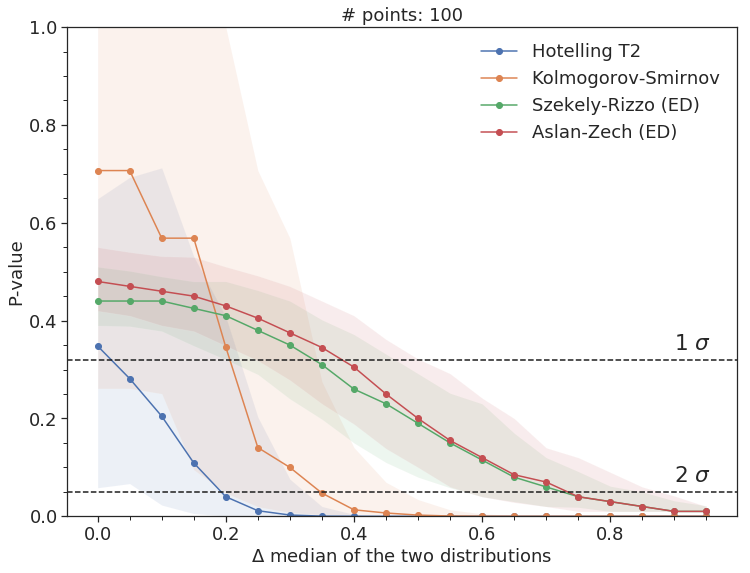

In [8]:
plt.figure(figsize=(12,9))
plt.plot(meanvals, np.median(pval_T2,1),'-o',label='Hotelling T2')
plt.fill_between(meanvals, np.percentile(pval_T2,16,1),np.percentile(pval_T2,84,1),alpha=0.1)
plt.plot(meanvals, np.median(pval_KS,1),'-o',label='Kolmogorov-Smirnov')
plt.fill_between(meanvals, np.percentile(pval_KS,16,1),np.percentile(pval_KS,84,1),alpha=0.1)
plt.plot(meanvals, np.median(pval_ED_SR,1),'-o',label='Szekely-Rizzo (ED)')
plt.fill_between(meanvals, np.percentile(pval_ED_SR,16,1),np.percentile(pval_ED_SR,84,1),alpha=0.1)
plt.plot(meanvals, np.median(pval_ED_AZ,1),'-o',label='Aslan-Zech (ED)')
plt.fill_between(meanvals, np.percentile(pval_ED_AZ,16,1),np.percentile(pval_ED_AZ,84,1),alpha=0.1)
plt.xlabel(r'$\Delta$ median of the two distributions',fontsize=18)
plt.ylabel('P-value',fontsize=18)
plt.title('# points: %.0f' %num_pts,fontsize=18)
plt.legend(fontsize=18,bbox_to_anchor=(1,1),edgecolor='w')
tempx = plt.xlim()
plt.plot(tempx,[0.32,0.32],'k--')
plt.text(0.9,0.34, r'1 $\sigma$')
plt.plot(tempx,[0.05,0.05],'k--')
plt.text(0.9,0.07, r'2 $\sigma$')
plt.xlim(tempx)
plt.ylim(0,1)
#plt.yscale('log'); plt.ylim(1e-3,1)
plt.show()